In [1]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd # Import pandas to work with DataFrames

In [3]:
pip install ipywidgets --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from datasets import load_dataset

# Beispiel: MultiCoNER Dataset laden
dataset = load_dataset('unimelb-nlp/wikiann', 'it')

# Struktur anzeigen (erste 5 Einträge des Trainingssets)
print(dataset['train'][:5])

validation-00000-of-00001.parquet:   0%|          | 0.00/698k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/706k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

{'tokens': [["'", "''", 'Andrew', 'Noble', "''", "'", '-', 'fisico', 'britannico'], ['Eliminato', 'al', '4T', 'da', 'Andy', 'Murray', '[3]'], ["'", "''", 'Suzuki', "''", "'"], ['Seekirchen', 'am', 'Wallersee'], ['Ha', 'mutuato', 'il', 'nome', 'dal', 'capoluogo', 'Tarfaya', '.']], 'ner_tags': [[0, 0, 1, 2, 0, 0, 0, 0, 5], [0, 0, 0, 0, 1, 2, 0], [0, 0, 3, 0, 0], [5, 6, 6], [0, 0, 0, 0, 0, 0, 5, 0]], 'langs': [['it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it'], ['it', 'it', 'it', 'it', 'it', 'it', 'it'], ['it', 'it', 'it', 'it', 'it'], ['it', 'it', 'it'], ['it', 'it', 'it', 'it', 'it', 'it', 'it', 'it']], 'spans': [['PER: Andrew Noble', 'LOC: britannico'], ['PER: Andy Murray'], ['ORG: Suzuki'], ['LOC: Seekirchen am Wallersee'], ['LOC: Tarfaya']]}


In [5]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train']) # Create a DataFrame named df

df.head() # Now you can call head() on df


,tokens,ner_tags,langs,spans
0,"[', '', Andrew, Noble, '', ', -, fisico, brita...","[0, 0, 1, 2, 0, 0, 0, 0, 5]","[it, it, it, it, it, it, it, it, it]","[PER: Andrew Noble, LOC: britannico]"
1,"[Eliminato, al, 4T, da, Andy, Murray, [3]]","[0, 0, 0, 0, 1, 2, 0]","[it, it, it, it, it, it, it]",[PER: Andy Murray]
2,"[', '', Suzuki, '', ']","[0, 0, 3, 0, 0]","[it, it, it, it, it]",[ORG: Suzuki]
3,"[Seekirchen, am, Wallersee]","[5, 6, 6]","[it, it, it]",[LOC: Seekirchen am Wallersee]
4,"[Ha, mutuato, il, nome, dal, capoluogo, Tarfay...","[0, 0, 0, 0, 0, 0, 5, 0]","[it, it, it, it, it, it, it, it]",[LOC: Tarfaya]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    20000 non-null  object
 1   ner_tags  20000 non-null  object
 2   langs     20000 non-null  object
 3   spans     20000 non-null  object
dtypes: object(4)
memory usage: 625.1+ KB


In [6]:
df.describe()

,tokens,ner_tags,langs,spans
count,20000,20000,20000,20000
unique,18327,3742,58,16223
top,"[', '', Honda, '', ']","[0, 0, 1, 2, 0, 0]","[it, it, it, it, it]",[ORG: Honda]
freq,138,1084,3970,139


In [6]:
df.columns

Index(['tokens', 'ner_tags', 'langs', 'spans'], dtype='object')

In [7]:
# Examine entity distribution to show distribution of different entity types in the dataset:
entity_counts = df['ner_tags'].value_counts()
print(entity_counts)

ner_tags
[0, 0, 1, 2, 0, 0]                                                                         1084
[1, 2, 0, 0, 0, 0, 0]                                                                       796
[0, 0, 5, 0, 0]                                                                             610
[3, 4, 4, 4]                                                                                508
[3, 4, 4, 4, 4]                                                                             434
                                                                                           ... 
[1, 2, 0, 3, 0, 0, 3, 4, 0]                                                                   1
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]                                                 1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 0]                                              1
[0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]                                        1
[0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 

In [8]:
# Check for class imbalance to identify if certain entity types are underrepresented:
entity_percentages = (entity_counts / len(df)) * 100
print(entity_percentages)

ner_tags
[0, 0, 1, 2, 0, 0]                                                                         5.420
[1, 2, 0, 0, 0, 0, 0]                                                                      3.980
[0, 0, 5, 0, 0]                                                                            3.050
[3, 4, 4, 4]                                                                               2.540
[3, 4, 4, 4, 4]                                                                            2.170
                                                                                           ...  
[1, 2, 0, 3, 0, 0, 3, 4, 0]                                                                0.005
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]                                              0.005
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 0]                                           0.005
[0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]                                     0.005
[0, 0, 0, 0, 0, 0, 0,

In [9]:
# Analyze token length distribution to provide insights into the length of the individual tokens (words) in the dataset:
df['token_lengths'] = df['tokens'].apply(lambda x: [len(token) for token in x])
token_lengths = [length for lengths in df['token_lengths'] for length in lengths]
print(pd.Series(token_lengths).describe())
# count: total, mean: average length, std: standard deviation in characters, min: shortest token, max: longest token, %: percentage of tokens

count    162487.000000
mean          4.308339
std           3.157082
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          53.000000
dtype: float64


In [10]:
# Visualize the entity distribution in the dataset by creating a horizontal bar plot:
# Get the label mapping from the dataset first, wo we can see the labels instead of just the numbers 0-6:
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}


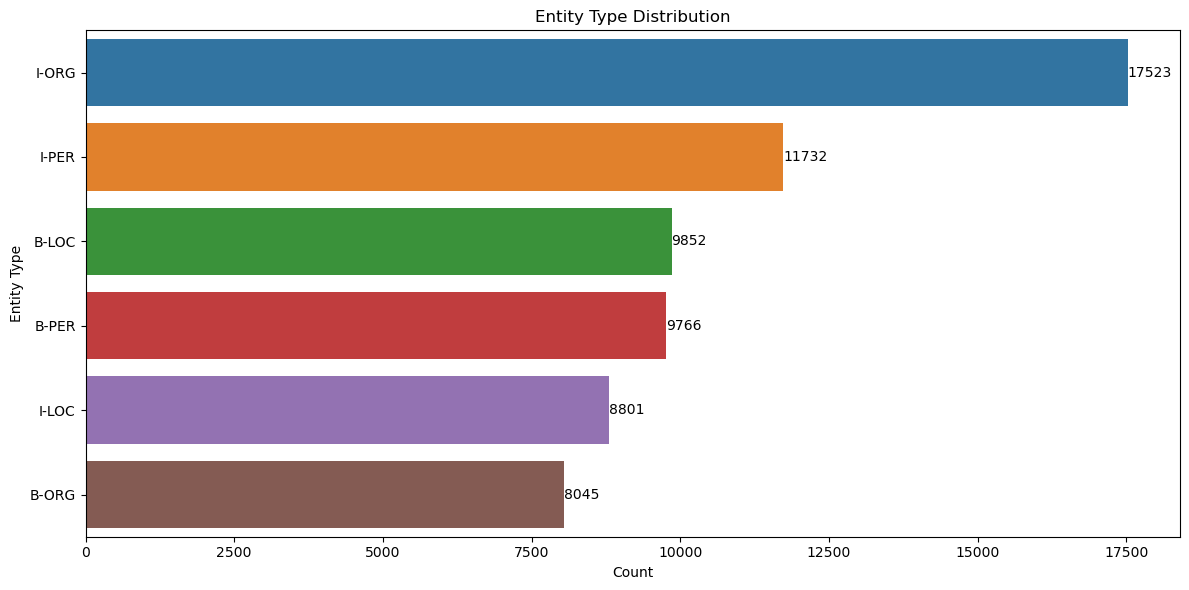

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each entity type
entity_counts = df['ner_tags'].apply(lambda x: [tag for tag in x if tag != 0]).explode().value_counts()

# Map numeric encodings to actual entity labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts_labeled.values, y=entity_counts_labeled.index, orient='h')

# Customize the plot
plt.title('Entity Type Distribution')
plt.xlabel('Count')
plt.ylabel('Entity Type')

# Add count labels to the end of each bar
for i, v in enumerate(entity_counts_labeled.values):
    plt.text(v + 0.1, i, str(v), va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

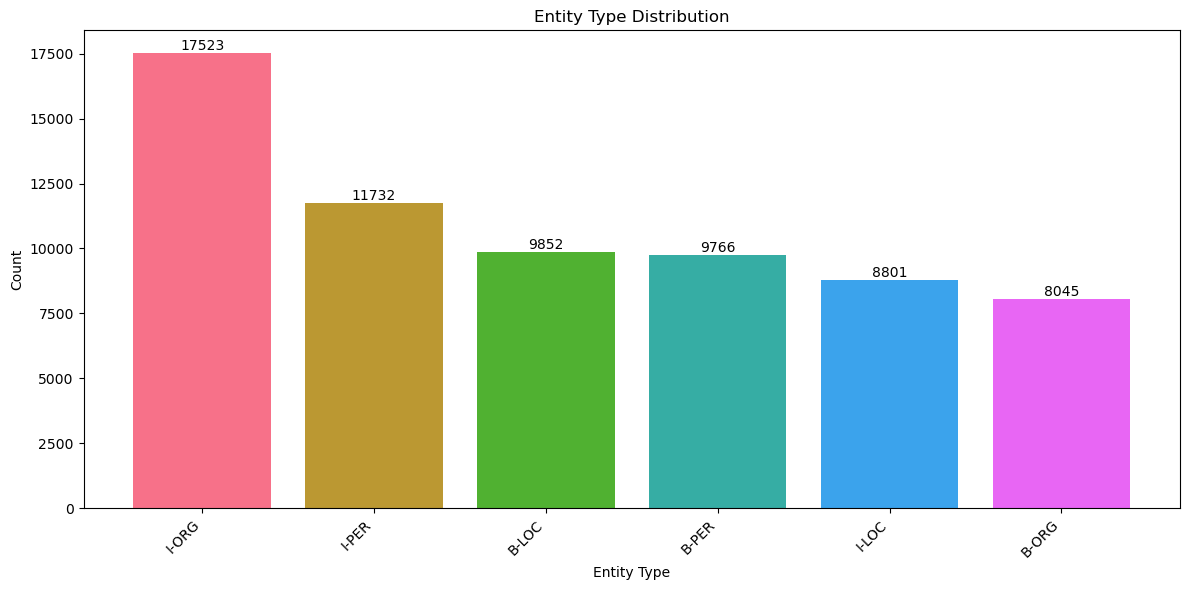

In [12]:
# alternative Darstellung :)
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's create a mapping from numeric codes to entity labels
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}

# Now, let's map the entity counts to their actual labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

plt.figure(figsize=(12, 6))

# Use seaborn's color palette for distinct colors
colors = sns.color_palette("husl", len(entity_counts_labeled))

# Create the bar plot with different colors
bars = plt.bar(entity_counts_labeled.index, entity_counts_labeled.values, color=colors)

plt.title('Entity Type Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [13]:
# Check for missing values to identify missing data in the dataset:
print(df.isnull().sum())

tokens           0
ner_tags         0
langs            0
spans            0
token_lengths    0
dtype: int64


In [14]:
# Examine unique tokens to give me an idea of the vocabulary size in the dataset:
unique_tokens = set([token for tokens in df['tokens'] for token in tokens])
print(f"Number of unique tokens: {len(unique_tokens)}")


Number of unique tokens: 30096


In [15]:
# Analyze sentence length distribution to get insight on the length of sentences in the dataset:
df['sentence_length'] = df['tokens'].apply(lambda x: len(x))
print(df['sentence_length'].describe())


count    20000.000000
mean         8.124350
std          5.297461
min          3.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        120.000000
Name: sentence_length, dtype: float64
